# CellPLATO | Cell Plasticity Analysis Tool

Step 1: Fill in the config file!

Also, make sure your data is set up in the following two tiered format:

        Master
            ├── Condition 1
            │   ├── Replicate 1
            |   |       ├── tracks.h5
            │   ├── Replicate 2
            |   |       ├── tracks.h5            
            │   └── Replicate 3
            |           └── tracks.h5            
            │  
            └── Condition 2,
                ├── Replicate 1
                |       ├── tracks.h5
                ├── Replicate 2
                |       ├── tracks.h5            
                └── Replicate 3
                        └── tracks.h5    

<div class="alert alert-block alert-danger">
Set your kernel to 'cellPLATO' before continuing
</div>

<div class="alert alert-block alert-success">
<h2>1. Start by importing packages for cellPLATO</h1>
</div>

This includes cellPLATO itself, and all of the modules you will need

* Import these packages, checking that you have them
* We're also importing a lot of the modules in cellPLATO, if this cell runs successfully, you are good to go!

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio

import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib.cm as cm
import plotly.graph_objects as go
import plotly.express as px

OVERWRITE_DATAFRAMES = True

Finished running cellPLATO initialization and loaded config.
Initializing:  Donor2and4
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4_OUTPUT/Donor2and4\2024-05-08_11-52-27-802437\plots/
Using unique embedding per dataset shortname:  Donor2and4
Exporting static Superplots
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Exporting SNS Bar plots
Using corresponding CTL_SHORTLABEL:  ICAM1  for condition:  Condition_ICAM_noIL15
Dataset in current notebook:  Donor2and4
Finished initializing data_processing



Bad key text.latex.preview in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\envs\cellPLATO_gitversion\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_qualit

Finished intializing visualizations
Finished initializing cellPLATO


In [2]:
import matplotlib
#get matplotlib version
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


# Import your experiment list

Check that the list generated in the next cell contains your conditions and replicates

In [ ]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)
print(cp.SAVED_DATA_PATH)

<div class="alert alert-block alert-success">
<h2>2. Measurements of morphology and migration</h1>
</div>

### This cell does migration and morphology measurements for all of the cells at each timepoint 

In [ ]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

comb_df, new_factors = cp.measurement_pipeline(comb_df, mixed=cp.MIXED_SCALING, factors_to_timeaverage = cp.ALL_FACTORS) 
display(new_factors)

# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)

# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)

### Optional: make plots for a chosen factor

In [ ]:
## Factor list: 
all_factors =  ['area',
                'bbox_area',
                'eccentricity',
                'equivalent_diameter',
                'extent',
                'filled_area',
                'major_axis_length',
                'minor_axis_length',
                'orientation',
                'perimeter',
                'solidity',
                'euclidean_dist',     
                'cumulative_length', 
                'speed',
                'orientedness', 
                'directedness',
                'turn_angle',
                'endpoint_dir_ratio',
                'dir_autocorr',
                'outreach_ratio',
                'MSD',                
                'max_dist',           
                'glob_turn_deg',
                'arrest_coefficient'
                'aspect',
                'rip_p',
                'rip_K',
                'rip_L']

In [ ]:
chosen_factor='area'

In [ ]:
# This is a timeplot of the chosen factor (mean, 95% CI) for each condition

f=cp.multi_condition_timeplot(comb_df, factor = chosen_factor)
f.show()

In [ ]:
# This calculated the effect size for each condition relative to the control defined in the config

cp.timeplots_of_differences(comb_df_filt,factor=chosen_factor)

In [ ]:
# This makes a comparative plot of difference based on the time averaged dataframe

f=cp.plots_of_differences_sns(tavg_df,factor=chosen_factor)
f.show()

And then gives you the option to save the dataframes into your automatically created 'saved data' folder

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv', index=False)
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv', index=False)

### Optional: load in precreated dataframes

In [ ]:
comb_df = pd.read_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
tavg_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')

### Optional: do filtering on the data (on top of what has been stated in the config file)

In [ ]:
# User-defined filters in dict {factor:(min, max)}

data_filters = {
#   "speed": (10, 100),
  "ntpts": (8, 60),
#    "frame": (0, 450), # Warning: range will change if self-normalized
#   "ntpts": (12,1800)
}

# Returns a filtered dataframe, while also adding included column to comb_df
filt_df, filt_counts = cp.apply_filters(comb_df,how='any', filter_dict=data_filters)

fig = cp.visualize_filtering(filt_df, filt_counts)

# Plot all metrics

This cell makes comparative plots for every single metric and saves them in your output folder

* Plots of difference
* Timeplots of difference
* Marginal xy plots
* Simple bar plots
* Superplots - useful for comparing between replicates

<div class="alert alert-block alert-danger">
Check that you are happy with your extra filtering before continuing
Run the next cell on the filtered dataframe or the unfiltered dataframe once you are ready
</div>

In [ ]:
# Outputs plots of all metrics for all factors
cp.comparative_visualization_pipeline(comb_df, num_factors=all_factors) 

<div class="alert alert-block alert-success">
<h2>3. Definition of single timepoint behavioural clusters using UMAP and HDBSCAN</h1>
</div>

### Optional: for new datasets perform correlation analysis to understand which factors correlate to one another

This may aid in choosing the most important factors, aiding clustering

In [ ]:
df_in = comb_df
cp.correlation_matrix_heatmap(df_in, factors = cp.ALL_FACTORS)

### Optional: use variance thresholder for further insight

In [ ]:
chosen_dr_factors = cp.variance_threshold(comb_df, threshold_value=0.03)
chosen_dr_factors

### Optional: define a new list of dr_factors to use for UMAP

In [ ]:
REGIONPROPS_LIST = ['area',
                    'bbox_area',
                    'eccentricity',
                    'equivalent_diameter',
                    'extent',
                    'filled_area',
                    'major_axis_length',
                    'minor_axis_length',
                    'orientation',
                    'perimeter',
                     'solidity'
                     ]

MIG_FACTORS = ['euclidean_dist',     
                'cumulative_length', 
                'speed',
                'orientedness', 
                'directedness',
                'turn_angle',
                'endpoint_dir_ratio',
                'dir_autocorr',
                'outreach_ratio',
                'MSD',                
                'max_dist',           
                'glob_turn_deg',
                'arrest_coefficient']

ADDITIONAL_FACTORS = ['aspect', 'rip_L'] # 'rip_p', 'rip_K', 


DR_FACTORS = REGIONPROPS_LIST + MIG_FACTORS + ADDITIONAL_FACTORS

### Optional: Take a sample of cells from each Replicate_ID

In [ ]:
import random
uniq_ids = comb_df.groupby('Replicate_ID')['uniq_id'].unique().tolist()
# Create a new list to store the sampled unique IDs
sampled_uniq_ids = []
# Iterate over each replicate ID
for i, replicate_id in enumerate(uniq_ids):
    total_sample_size_counter.append(total_sample_size)
    sample_size=len(replicate_id) // 2
    sampled_ids = random.sample(replicate_id.tolist(), sample_size)
    sampled_uniq_ids.extend(sampled_ids)

print(len(sampled_uniq_ids))
# print(sampled_uniq_ids.shape())



In [ ]:
import random
uniq_ids = comb_df.groupby('Replicate_ID')['uniq_id'].unique().tolist()

# Create a new list to store the sampled unique IDs
sampled_uniq_ids = []

for condition in comb_df['Condition'].unique():
    condition_df = comb_df[comb_df['Condition'] == condition]
    uniq_ids = condition_df.groupby('Replicate_ID')['uniq_id'].unique().tolist()
    
    for replicate_id in condition_df['Replicate_ID'].unique():

        replicate_df = condition_df[condition_df['Replicate_ID'] == replicate_id]
        rep_uniq_ids = replicate_df['uniq_id'].unique().tolist()
        sample_size = len(rep_uniq_ids) // 2
        sampled_ids = random.sample(rep_uniq_ids, sample_size)
        sampled_uniq_ids.extend(sampled_ids)



## Perform UMAP and cluster analysis

### First, do UMAP, save the new df and plot the UMAP

Well separated clusters depend mostly on 1. the input factors and 2. the umap_nn setting

You can change both, depending on the nature of your data, in order to achieve a reasonable level of separation of clusters

In [ ]:
###### User alterable parameters ######
tsne_perp=150
umap_nn = 50 #umap nearest neighbours
min_dist = 0.0 #umap minimum distance (usually keep this at 0 or very low)
n_components = 3 # number of umap dimensions to calculate
#######################################


# for umap_nn in [40,50, 60, 70, 80, 90, 100]:

dr_df = cp.dr_pipeline_multiUMAPandTSNE(comb_df, 
                    dr_factors=DR_FACTORS,
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist= min_dist,
                    scalingmethod = 'choice',
                    do_tsne=False) # A number of scaling methods are available: 'choice', 'minmax', 'standard', 'robust', 'normalize', 'quantile', 'maxabs', 'yeo-johnson', 'box-cox'

dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df_'+ str(umap_nn) + '.csv', index=False) # Saves the df

cp.plot_3D_scatter(dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='condition', ticks=False, identifier='dr_df_' + str(umap_nn), dotsize = 0.01, alpha=0.1, markerscale = 100) #color = label or condition  

In [ ]:
# save the dr_df
dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv', index=False)

In [ ]:
##### User adjustable parameters #####
min_cluster_size = 800
min_samples = 300 #300 #500
cluster_by = 'UMAPNDIM' # UMAPNDIM = default, clusters on UMAPs. NDIM = alternate, clusters on all dimensions
metric = 'euclidean' # See https://hdbscan.readthedocs.io/en/latest/api.html#hdbscan.HDBSCAN for options
#######################################

lab_dr_df, exemplar_df=cp.hdbscan_clustering(dr_df, min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_by=cluster_by,  metric=metric)

lab_dr_df.name='lab_dr_df'
name = lab_dr_df.name

lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df' + str(umap_nn)+str(min_samples)+'.csv', index=False)
exemplar_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df' + str(umap_nn)+str(min_samples)+'.csv', index=False)

cp.plot_3D_scatter(lab_dr_df, 'UMAP1', 'UMAP2', 'UMAP3', colorby='label', ticks=False, identifier=name + 'thisone'+str(umap_nn)+str(min_samples),dotsize = 0.01, alpha=0.1, markerscale = 100) #color = label or condition   


## Then plot the 'fingerprint' plot of percentage in each cluster per condition

In [ ]:
# This is the new combo
cluster_purity_df = cp.purity_pointsinclusterspercondition(lab_dr_df) 
display(cluster_purity_df)
f = cp.purityplot_percentcluspercondition(lab_dr_df, cluster_purity_df) 

### Optional: explore the clusters with interactive 3D plot

In [ ]:
cp.interactive_plot_3D_UMAP(df=lab_dr_df,colorby = 'Condition_shortlabel', symbolby = 'Condition_shortlabel', what = ' AllTimeUMAPwithclusters') # TavgUMAPwithclusters

### Optional: all other conditions colored grey, chosen condition in color

In [ ]:
df=lab_dr_df

condlist = df['Condition_shortlabel'].unique().tolist() #get unique list of conditions from df
print(condlist) # show the condition list
# chosen_condition = '' #specify a chosen condition from the list
chosen_condition = condlist[0] # or choose the first one
print(chosen_condition)

cp.interactive_plot_3D_UMAP_chosen_condition(df, chosen_condition, opacity_grey=0.01, marker_size_all=2,) #change opacity and marker size to suit the data

### Optional: make UMAP plots colored by metric contributors - the more intense the color, the higher the contribution the metric to a cluster

In [ ]:
# First one colors per metric
cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=lab_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='choice',
                                                   identifier='inferno', colormap='inferno', coloredbycondition = False, samplethedf = False)
#second one colors per condition
# cp.plot_UMAP_subplots_coloredbymetricsorconditions(df_in=tptlabel_dr_df, x= 'UMAP1', y= 'UMAP2', z = 'UMAP3', n_cols = 5, ticks=False, metrics = cp.ALL_FACTORS, scalingmethod='choice',
#                                                    identifier='inferno', colormap='inferno', coloredbycondition = True, samplethedf = False)

### Perform UMAP then HDBSCAN on the tavg_df (deprecated)

This step used to add tavg_label to the dataframe. Its deprecated and can be skipped.

In [ ]:
tsne_perp=150
umap_nn = 20#4#60
min_dist = 0.0 #0.15 
n_components = 3

tavg_dr_df = cp.dr_pipeline_multiUMAPandTSNE(tavg_df, 
                    dr_factors=newnew_DR_FACTORS,# new_DR_FACTORS # DR_FACTORS #only_tmeans # cp.DR_FACTORS
                    n_components = n_components,
                    umap_nn=umap_nn,
                    min_dist= min_dist,
                    scalingmethod = 'choice',) # log2minmax # powertransformer #minmax

lab_tavg_dr_df, exemplar_tavg_df=cp.hdbscan_clustering(tavg_dr_df, min_cluster_size=50,min_samples=50,cluster_by='UMAPNDIM',  metric='euclidean', plot=False) # 

#Run this function to put the labels into the lab_tavg_lab_dr_df. Slow function. Can update search by uniq_id alone...

lab_tavg_lab_dr_df=cp.add_tavglabel_todf(lab_dr_df_ACTUAL, lab_tavg_dr_df)
lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv', index=False)
 

Instead, just make lab_tavg_dr_df by adding random labels to a new column called tavg_label

In [ ]:
lab_dr_df['tavg_label'] = np.random.randint(0, 5, lab_dr_df.shape[0])
lab_tavg_lab_dr_df = lab_dr_df
# lab_tavg_lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_lab_dr_df.csv', index=False)


<div class="alert alert-block alert-danger">
Save your dataframes so you can come back to this step if necessary
</div>

In [ ]:
OVERWRITE_DATAFRAMES = True

if OVERWRITE_DATAFRAMES:
    tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_dr_df.csv', index=False)
    lab_tavg_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_tavg_dr_df.csv', index=False)
    exemplar_tavg_df.to_csv(cp.SAVED_DATA_PATH + 'exemplar_tavg_df.csv', index=False)

## Quantify the plasticity 

This cell counts the number of single timepoint cluster switches, creating new dataframe tptlabel_dr_df

In [ ]:
tptlabel_dr_df = cp.count_cluster_changes_with_tavg(lab_tavg_lab_dr_df)
tptlabel_dr_df.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv', index=False)

### Plots of plasticity

In [ ]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

In [ ]:
df=tptlabel_dr_df
cp.plot_plasticity_changes(df, identifier='\_allcells', maxy=4) 

In [ ]:
df=tptlabel_dr_df
cp.plot_plasticity_countplots(df, identifier='_allcells')

In [ ]:
df=tptlabel_dr_df
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_allcells', miny=None, maxy=None, t_window_multiplier = cp.T_WINDOW_MULTIPLIER, plotallcells = False)

# De-abstractify the clusters!
This set of functions makes plots to describe the nature of cells from each cluster

### First, choose a number of exemplar cells to pick out from the exemplar cell list to display

In [ ]:
# Choose a number of exemplars to display for each cluster
n=5
exemplar_df = exemplar_df.groupby('label').apply(lambda x: x.sample(min(n,len(x)))).reset_index(drop=True)

### Show exemplar cells overlaid onto raw data

Note - you must have the raw data in the folder with the masks

In [ ]:
cp.make_raw_cell_png_overlaidwith_behaviourcontourandtrack(tptlabel_dr_df, exemplar_df, LUTlow=5, LUThi=140, XYRange = 200, invert=True)

### Optional: make a full de-abstractification

The following functions 
1. Rank features based on their contribution to the formation of each cluster
2. compute averages of each feature per cluster and print a table
3. Makes per cell plots over time of a) top contributing features, b) cluster switches and c) contour maps

In [ ]:
size=220 #

df= tptlabel_dr_df #from the all analysis part
exemp_df=exemplar_df #from the cluster analysis part.

top_dictionary, contributions_df_singletpoints, scaled_df=cp.contribution_to_clusters(df_in=tptlabel_dr_df,  howmanyfactors=3, dr_factors= DR_factors) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.plot_cluster_averages(top_dictionary, df, scaled_df)
result_df = cp.create_cluster_averages_table(top_dictionary, df, scaled_df)
cp.disambiguate_timepoint(df, exemp_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True, trajectory = False) 

In [ ]:

tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')
exemplar_df = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df.csv')

Optional: plots plasticity changes in a subset of exemplar cells over time

In [ ]:
#### User inputs ####
whole_df = tptlabel_dr_df
exemplar_df = exemplar_df
numberofdesiredtimepoints = int(whole_df['ntpts'].mean())
numberofcellspercluster = 40
num_clusters_whole_dataset = len(whole_df['label'].unique())
# override = int((numberofcellspercluster*num_clusters_whole_dataset)*0.7)
#####################

exemplar_df_filt, exemplar_cell_tracks_df = cp.filter_exemplars(whole_df=whole_df, exemplar_df = exemplar_df, numberofdesiredtimepoints = numberofdesiredtimepoints, 
                                                                    numberofcellspercluster = numberofcellspercluster, override = override)

In [ ]:
df=exemplar_cell_tracks_df
cp.plot_cumulative_plasticity_changes_main(df, identifier='\_exemplars_only_3_df__', miny=None, maxy=None, t_window_multiplier = 1, plotallcells = False)

### Plot any factor as small multiples from the exemplars

Gives a line plot of any feature desired from the exemplars

In [ ]:
df = exemplar_cell_tracks_df
whichcolumntoplot = 'label'

cp.plot_small_multiples(df, whichcolumntoplot)

<div class="alert alert-block alert-success">
<h2>4. Trajectory measurement: Damerau-Levenshtein</h1>
</div>

This part measures the similarity of sequences of single timepoint cluster IDs, in order to create trajectories of behaviour that can be compared between conditions

In [ ]:
tptlabel_dr_df = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df.csv')

### First filter the tptlabel_dr_df to include only a subset of data of similar timescale

In [ ]:
low = 180
high = 220

tptlabel_dr_df_filt = tptlabel_dr_df[tptlabel_dr_df['ntpts'].between(low, high)]
print(f'You are sampling {len(tptlabel_dr_df_filt.uniq_id.unique())} cells')

### Verify that the filtered data reflects the total data

In [ ]:
factorchoice = 'speed'

In [ ]:
# Makes timeplots of the unfiltered and filtered data

f=cp.multi_condition_timeplot(tptlabel_dr_df, factorchoice)
f.show()
f=cp.multi_condition_timeplot(tptlabel_dr_df_filt, factorchoice)
f.show()

In [ ]:
# Plot of difference of the unfiltered and filtered data
f = cp.plots_of_differences_sns(tavg_df, factorchoice)
f.show()

In [ ]:
tavg_trajectory_df = cp.time_average(tptlabel_dr_df_filt)
f = cp.plots_of_differences_sns(tavg_trajectory_df, factorchoice)
f.show()

### Perform Damerau-Levenshtein analysis

In [ ]:
df = tptlabel_dr_df_filt
distance_matrix_dameraulev = cp.calculate_edit_distances(df,distancemetric = 'dameraulev', print_interval=10000) #fastdtw # dameraulev # mongeelkan
print(distance_matrix_dameraulev.shape)

### Perform a UMAP/HDBSCAN parameter sweep, and select plots

In [ ]:
'''Sweep through a number of UMAP/HDBSCAN settings to ensure good clustering '''

df = tptlabel_dr_df_filt
for n_neighbors in [8, 10, 12]:
    for min_samples in [5,8,10, 15, 30, 40]:
        for min_cluster_size in [5,8,10, 15, 30, 40]:
            print(f'min_samples = {min_samples}')
            print(f'min_cluster_size = {min_cluster_size}')
            print(f'n_neighbors = {n_neighbors}')
            tptlabel_dr_df_filt_clusteredtrajectories = cp.cluster_sequences(df, distance_matrix_dameraulev,
             do_umap=True, eps=0.1, min_samples=min_samples, min_cluster_size=min_cluster_size, n_neighbors=n_neighbors)

In [ ]:
'''Chosen UMAP and HDBSCAN parameters'''

min_samples = 10
min_cluster_size = 5
n_neighbors = 8

df = tptlabel_dr_df_filt

print(f'min_samples = {min_samples}')
print(f'min_cluster_size = {min_cluster_size}')
print(f'n_neighbors = {n_neighbors}')
tptlabel_dr_df_filt_clusteredtrajectories = cp.cluster_sequences(df, distance_matrix_dameraulev,
 do_umap=True, eps=0.1, min_samples=min_samples, min_cluster_size=min_cluster_size, n_neighbors=n_neighbors)

In [ ]:
# remove the -1 TRAJECTORY cluster if required
# tptlabel_dr_df_filt_clusteredtrajectories = tptlabel_dr_df_filt_clusteredtrajectories[tptlabel_dr_df_filt_clusteredtrajectories['trajectory_id'] != -1]

Get the fingerprint plot of trajectories

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories

cluster_purity_df = cp.purity_pointsinclusterspercondition(df, cluster_label='trajectory_id') 
f = cp.purityplot_percentcluspercondition(df, cluster_purity_df, cluster_label='trajectory_id', dotsize = 30) 

 ### Disambiguate the trajectory clustered cells:
 1) Make an exemplar_df_trajectories containing example rows
 2) Get the full tracks from those rows and make exemplar_df_trajectories_fulltrack
 2) Disambiguate with exemplar_df_trajectories
 3) Plot multiples with exemplar_df_trajectories_fulltrack

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
exemplar_df_trajectories, exemplar_df_trajectories_fulltrack  = cp.make_exemplar_df_basedon_trajectories(df, cells_per_traj=30)

In [ ]:
# full_tracks_df = pd.read_csv(cp.SAVED_DATA_PATH + 'full_tracks_df.csv')
df = exemplar_df_trajectories_fulltrack
cp.plot_trajectories(df=exemplar_df_trajectories_fulltrack, global_y=True, global_x=True)

### Optional: full deabstractification of trajectory clusters

In [ ]:
size=300 #


df= tptlabel_dr_df_filt_clusteredtrajectories 
exemp_df=exemplar_df_trajectories 

top_dictionary, contributions_df_singletpoints, scaled_df=cp.contribution_to_clusters(df_in=tptlabel_dr_df,  howmanyfactors=2, dr_factors= DR_FACTORS) #BEFORE disambiguate_tavg(), then: lab_tavg_dr_df BEFORE disambiguate_timepoint(), then: #tptlabel_dr_df 
cp.plot_cluster_averages(top_dictionary, df, scaled_df)
result_df = cp.create_cluster_averages_table(top_dictionary, df, scaled_df)
cp.disambiguate_timepoint(df, exemp_df, scaled_df, top_dictionary=top_dictionary, XYRange=size,boxoff=True, trajectory = True) 

# Percent fingerprint plot for cluster IDs per TRAJECTORY

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
cp.fingerprintplot_clusters_per_trajectory(df)

# Plasticity of cells per trajectory

,trajectory_id,uniq_id,cum_n_changes
0,0,0_1017,0
1,0,0_11175,14
2,0,0_11721,0
3,0,0_12061,17
4,0,0_1246,32
...,...,...,...
406,3,3_932,28
407,3,4_4733,46
408,3,4_915,39
409,3,5_3617,39


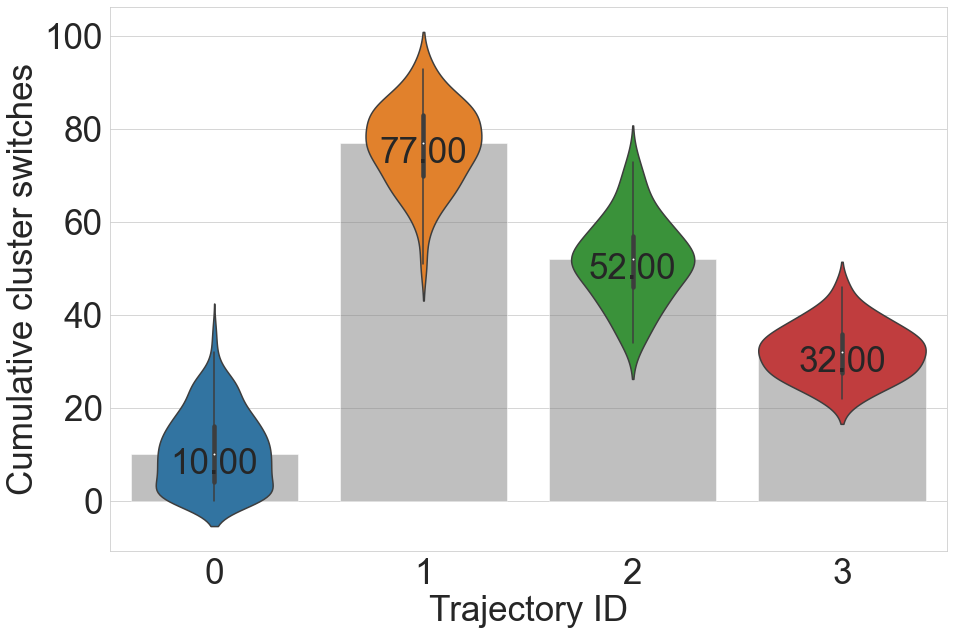

In [5]:
df=tptlabel_dr_df_filt_clusteredtrajectories
cp.plasticity_per_trajectory(df)

,Condition_shortlabel,uniq_id,cum_n_changes
0,ICAM1,0_1010,52
1,ICAM1,0_1017,0
2,ICAM1,0_11138,35
3,ICAM1,0_11175,14
4,ICAM1,0_11721,0
...,...,...,...
406,VCAM1 + IL15,5_568,8
407,VCAM1 + IL15,5_594,56
408,VCAM1 + IL15,5_596,25
409,VCAM1 + IL15,5_6613,6


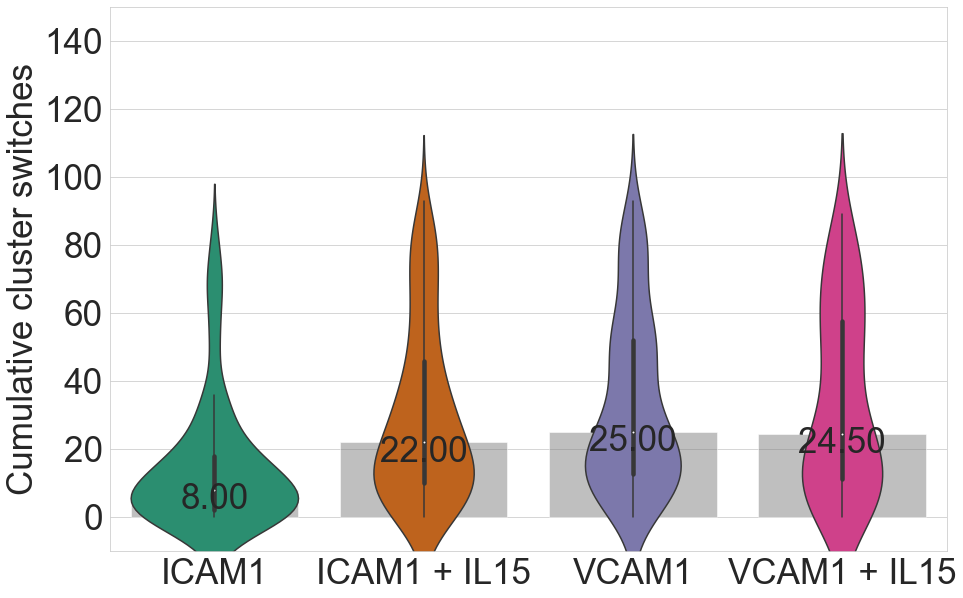

In [7]:
plasticity_per_condition(tptlabel_dr_df_filt_clusteredtrajectories)

In [ ]:
df=tptlabel_dr_df_filt_clusteredtrajectories
# all='\_allcells'
cp.plot_plasticity_changes_trajectories(df, identifier='\_allcells', maxy=9 , t_window_multiplier = 1) #problem with NaNs in the data

In [ ]:
#save all newly created dataframes
tptlabel_dr_df_filt_clusteredtrajectories.to_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories.csv', index=False)
exemplar_df_trajectories.to_csv(cp.SAVED_DATA_PATH + 'exemplar_df_trajectories.csv', index=False)

In [ ]:
# read in exemplar_df_trajectories
exemplar_df_trajectories = pd.read_csv(cp.SAVED_DATA_PATH + 'exemplar_df_trajectories.csv')

# Animations of trajectories

In [4]:
# read in tptlabel_dr_df_filt_clusteredtrajectories
# tptlabel_dr_df_filt_clusteredtrajectories = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories.csv')
tptlabel_dr_df_filt_clusteredtrajectories = pd.read_csv(cp.SAVED_DATA_PATH + 'tptlabel_dr_df_filt_clusteredtrajectories_FINAL170_190_3_28_2024.csv')

In [ ]:
df = tptlabel_dr_df_filt_clusteredtrajectories
cp.make_trajectory_animations(df, exemplar_df_trajectories, number_of_trajectories=10, colormode='trajectory') # singlecluster, cluster, trajectory

Select a number of example cells from each trajectory ID to map back on to the data and display as stacks of PNGs

In [4]:
####################################
number_of_trajectories =  3 # Select a number of trajectories to plot
####################################
df = tptlabel_dr_df_filt_clusteredtrajectories

trajectory_ids = df['trajectory_id'].unique()

uniq_id_choices_list = []

for trajectory_id_choice in trajectory_ids:
    # for each trajectory_id, get a list of possible uniq_ids from the df
    uniq_id_choices = tptlabel_dr_df_filt_clusteredtrajectories[tptlabel_dr_df_filt_clusteredtrajectories['trajectory_id']==trajectory_id_choice]['uniq_id'].values
    # Make sure each once is unique in that list
    uniq_id_choices = np.unique(uniq_id_choices)
    # choose a number of random uniq_ids from that list based on number_of_trajectories
    uniq_id_choices = np.random.choice(uniq_id_choices, number_of_trajectories)
    # append each choice to a list
    uniq_id_choices_list.append(uniq_id_choices)
# flatten the list
chosen_uniq_ids = [item for sublist in uniq_id_choices_list for item in sublist]
    
print(f'There are {len(chosen_uniq_ids)} cells')

#Filter the df to only include the chosen uniq_ids
subset_trajectories_df = tptlabel_dr_df_filt_clusteredtrajectories[tptlabel_dr_df_filt_clusteredtrajectories['uniq_id'].isin(chosen_uniq_ids)]

There are 12 cells


This function makes png image sequences of cells belonging to each trajectory and saves them for visualization. By changing the colormode from trajectory to cluster, you can color the cells by single timepoint cluster or trajectory cluster

In [6]:
df = subset_trajectories_df
cp.make_png_behaviour_trajectories(df,chosen_uniq_ids,XYRange = 300, follow_cell = False, invert=False, colormode = 'trajectory', snapshot=False)

Processing cell 2_27650
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_ICAM_plusIL15\Donor4_ICAM_plusIL15_tracks.h5


100%|██████████| 185/185 [00:58<00:00,  3.18it/s]


Processing cell 3_63
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 178/178 [00:55<00:00,  3.21it/s]


Processing cell 3_2113
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 184/184 [00:59<00:00,  3.08it/s]


Processing cell 3_17933
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 172/172 [00:51<00:00,  3.32it/s]


Processing cell 1_239
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_ICAM_plusIL15\Donor2_ICAM_plusIL15_tracks.h5


100%|██████████| 171/171 [00:53<00:00,  3.17it/s]


Processing cell 3_15219
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 172/172 [00:53<00:00,  3.20it/s]


Processing cell 3_932
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 180/180 [00:56<00:00,  3.19it/s]


Processing cell 3_24716
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_noIL15\Donor4_VCAM_noIL15_tracks.h5


100%|██████████| 185/185 [00:57<00:00,  3.21it/s]


Processing cell 0_22190
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_ICAM_noIL15\Donor4_ICAM_noIL15_tracks.h5


100%|██████████| 182/182 [00:56<00:00,  3.22it/s]


Processing cell 4_4837
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_VCAM_plusIL15\Donor2_VCAM_plusIL15_tracks.h5


100%|██████████| 174/174 [00:51<00:00,  3.39it/s]


Processing cell 2_1505
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_ICAM_plusIL15\Donor4_ICAM_plusIL15_tracks.h5


100%|██████████| 189/189 [01:01<00:00,  3.07it/s]


Processing cell 0_24023
Processing  D://Michael_Shannon/CELLPLATO_MASTER/COMBO_Donor2_Donor4/Condition_ICAM_noIL15\Donor4_ICAM_noIL15_tracks.h5


100%|██████████| 178/178 [00:54<00:00,  3.27it/s]


In [ ]:
df = subset_trajectories_df
cp.make_png_behaviour_trajectories(df,chosen_uniq_ids,XYRange = 300, follow_cell = False, invert=False, colormode = 'cluster')

This makes a png stack of the raw images to match the above contour maps

In [ ]:
df = subset_trajectories_df
cp.make_raw_cell_pngstacks(df,chosen_uniq_ids,XYRange = 300, follow_cell=False, invert=False)

STITCHING FUNCTION - its hard to manually visualize all of the trajectories for each cell, so this function allows one to make a big stitched image for visualization

In [3]:
folder_path = cp.TRAJECTORY_DISAMBIG_DIR

for foldername in os.listdir(folder_path):
    master = os.path.join(folder_path, foldername)
    output = master + '_output'

    cp.stitch_and_save_image_sequence_varying_sizes(master, output, reduce_size=True)

Extra Things if needed

In [ ]:
f=cp.plots_of_differences_donors(tavg_df,factor=chosen_factor)
f.show()

In [ ]:
### Some additional non-parametric stats (per condition) ###

from scipy.stats import kruskal, ranksums
import itertools
import pandas as pd

# Define the factor to analyze and potentially a list of conditions you're interested in
factor = 'cum_n_changes'
# Assuming input_df is your DataFrame and it's correctly loaded

# Group the data by 'Condition_shortlabel', focusing on the 'factor' values
grouped_data = input_df.groupby('Condition_shortlabel')[factor]

# Prepare a list of unique conditions to iterate through, if you haven't specified one
condition_order_list = input_df['Condition_shortlabel'].unique()

# Extract groups of data for each condition found in the DataFrame
groups = [grouped_data.get_group(condition).values for condition in condition_order_list if condition in grouped_data.groups]

# Perform Kruskal-Wallis test
kruskal_result = kruskal(*groups)

# Calculate the number of comparisons
num_comparisons = len(list(itertools.combinations(condition_order_list, 2)))

# Perform pairwise Wilcoxon rank-sum tests with Bonferroni correction
adjusted_alpha = 0.05 / num_comparisons
pairwise_results = []
for condition1, condition2 in itertools.combinations(condition_order_list, 2):
    if condition1 in grouped_data.groups and condition2 in grouped_data.groups:
        result = ranksums(grouped_data.get_group(condition1), grouped_data.get_group(condition2))
        # Adjust the p-value for multiple comparisons
        adjusted_pvalue = result.pvalue * num_comparisons
        # Ensure the adjusted p-value does not exceed 1
        adjusted_pvalue = min(adjusted_pvalue, 1)
        pairwise_results.append((condition1, condition2, result.pvalue, adjusted_pvalue))

# Print the results
print(f"Kruskal-Wallis test p-value: {kruskal_result.pvalue}")
for condition1, condition2, original_pvalue, adjusted_pvalue in pairwise_results:
    print(f"Original Wilcoxon rank-sum test p-value between {condition1} and {condition2}: {original_pvalue}")
    print(f"Adjusted Wilcoxon rank-sum test p-value between {condition1} and {condition2}: {adjusted_pvalue}")


In [ ]:
#### This makes line plots of cluster ID over time for a given set of uniq_ids in a given df ####

# import plot 
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

df_in = tptlabel_dr_df_filt_clusteredtrajectories

for chosen_cell in specific_uniques:
    print(chosen_cell)
    df = df_in[df_in['uniq_id']==chosen_cell]




    sizeoftext = cp.PLOT_TEXT_SIZE 

    # df = df_onecell
    num_rows = 1
    plt.rcParams.update({'font.size': sizeoftext})  
    figsize = (14, num_rows * 5) 
    trajectory_id = df['trajectory_id'].iloc[0]
    # Calculate the 'timeminutes' variable
    df['timeminutes'] = df['frame'] * cp.SAMPLING_INTERVAL
    condition = df['Condition_shortlabel'].iloc[0]
    uniq_id = df['uniq_id'].iloc[0]
    y_min = tptlabel_dr_df_filt_clusteredtrajectories['label'].min()
    y_max = tptlabel_dr_df_filt_clusteredtrajectories['label'].max()
    fig, ax = plt.subplots(num_rows, 1, figsize=figsize, sharex=False)
    fig.suptitle(f'Trajectory ID: {trajectory_id} Cell: {uniq_id}', y=0.95, fontsize=sizeoftext)
    ax.plot(df['timeminutes'], df['label'], label=f'{condition} ID: {uniq_id}', color='k')
    # ax.set_ylabel('Label',fontsize=cp.PLOT_TEXT_SIZE)
    ax.set_yticks(np.arange(y_min, y_max+1, 1))
    ax.set_yticklabels(ax.get_yticks(), fontsize=sizeoftext)  # Increase the font size of y ticks
    ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=sizeoftext)  # Convert x ticks to integers and increase the font size
    ax.set_ylim(y_min-0.5, y_max+0.5)
    ax.set_ylabel('Cluster', fontsize=sizeoftext)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.rcParams.update({'font.size': sizeoftext})  
    # save as png in a folder
    plt.savefig(path + f'\Timeplot_{uniq_id}_trajectory_{trajectory_id}.png', dpi=300)